# Práctica #02 - Minería de Datos -- Emmanuel Ontiveros Castillo

## Preparación de datos

    Importando librerías

In [27]:
import pandas as pd
import numpy as np
import pandas_profiling as pdprof
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

    Aquí leeré la base de datos.

In [28]:
df = pd.read_csv("C:\\Users\\Kradn\\OneDrive\\Escritorio\\Mineria de Datos\\Practica2\\winemag-data_first150k.csv")

    Aquí citaré las columnas de la base de datos. Esto lo hice para darme una idea principal del conjunto de datos con el que estoy tratando.

In [29]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

    Aqui mostré un poco de la base de datos para confirmar los nombres de las columnas y entrar un poco más en contexto con los datos que voy a estar manejando.

In [30]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


    Después, usé esta función para ver el tipo de variable con el que contaban las columnas y saber con cuales puedo trabajar para hacer gráficas. Al leer la información, me percaté que si voy a querer mostrarle a por ejemplo, un cliente cual es el resultado de la información recabada mediante imágenes, sería bueno tener en cuenta el promedio de calificacion y precio del producto. Así que quice ver si las columnas no tenian diferentes datos.

In [31]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

    Verifiqué que no hubiera campos nulos

In [32]:
df.isnull().any()

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

    Aquí saqué el promedio de la columna "Price". Porque si por ejemplo, fueramos contratados para hacer un analisis de esta información, sería importante hacer una comparativa de las estadísticas de popularidad de su producto. Para esto es importante saberel promedio general del precio y la calificación del producto. También ver cual es la popularidad entre las provincias.

In [33]:
df['price'].mean()

33.13148249353299

    Aquí saqué el promedio de la columna "Points" Este paso lo hice para poder darme una idea de como saldría el resultado con respecto a correlacion y covarianza, que hice en los siguientes pasos.

In [34]:
df['points'].mean()

87.8884184721394

    Después generé una correspondencia o relación recíproca entre entre las columnas "Price" y "Points"

In [35]:
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


    Y para esta linea generé una covarianza con las mismas columnas. Nos permite saber cómo se comporta una variable en función de lo que hace otra variable.

In [36]:
df.cov()

,Unnamed: 0,points,price
Unnamed: 0,1.898335e+09,-13225.241176,-58456.549452
points,-1.322524e+04,10.383809,53.813033
price,-5.845655e+04,53.813033,1319.326636


    Esta gráfica solamente la generé porque me pareció interesante como se solapaban los nombres de las provincias por el espacio. (Queria vers i se podía extender para verlos todos, pero por la cantidad de datos no se podría)

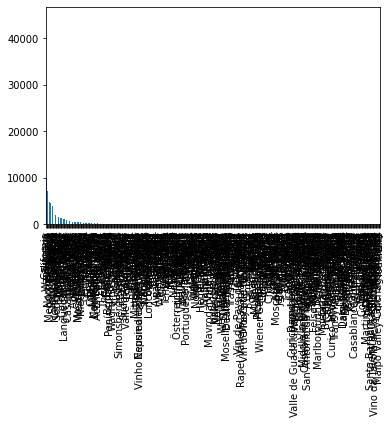

In [37]:
df['province'].value_counts().plot.bar()

## Gráficas

    Aquí generé una gráfica de líneas para poder mostrar el desarrollo de los valores cuantitativos (que verifiqué en pasos anteriores.

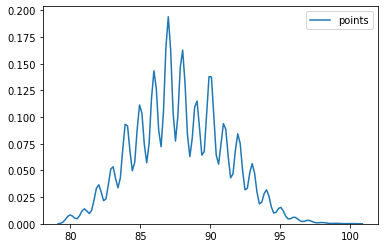

In [38]:
sns.kdeplot(df.query('points>33').points)

Aqui lo que pude ver fue como se iban distribuyendo las calificaciones que tenían los vinos de manera porcentual. Lo puse con relación al 33 que fué el promedio que saqué de precios. En este casi se apuntó que hay un 20% de vinos que tienen como calificación alrededor de 87, mismo valor que obtuve anteriormente.

    Aqui generé una gráfica de box plot, que se usa para resaltar aspectos de distribución de los datos metiante cuartiles.

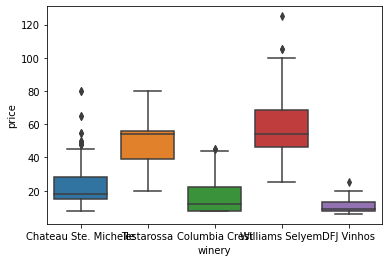

In [39]:
df = df[df.winery.isin(df.winery.value_counts().head(5).index)]

sns.boxplot(
    x='winery',
    y='price',
    data=df
)

Se muestra que en cuanto a la caja 1,3,4 y 5 presentan valores no comunes que podrían significar varianzas entre los precios de los vinos, cosa que podemos ver en la gráfica anterior.

    Me gustó esta gráficade hexagonal, porque se puede ver de una manera gráfica las distribuciones de precios que hablé anteriormente, aparte,te muestra los valores atípicos por precios, en este caso, hemos visto que las distribuciones fuertes se centran en el punto 87, pero la gráfica nos muestra zonas iluminadas con color que se encuentran fuera del rango promedio, esto hace dar a entender que existen valores atipicos en nuestros dato, cosa que podría servir, por ejemplo, encuestas, eliminar datos que no nos sirven. Además Elegí un gridsize (que es el numero de hexagonos que se generan) de 33 para poder ver con presición esos valores atipicos. El 33 por el promedio del precio

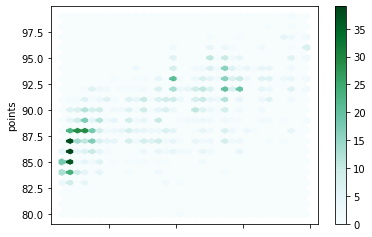

In [41]:
df[df['price'] < 80].plot.hexbin(x='price', y='points', gridsize=33)

    Tomando en cuenta cuando saqué el promedio de los precios y las calificaciones que tenian los vinos en las provincias, se puede notar que si se toma uno y otro como coordenadas coinciden en el punto donde hay más similitudes,tomando así un hexágono más oscuro que los demás. Aquí también se pueden ver los valores atípicos como en la gráfica anterior, haciendose ver un hexágono un poco más  oscuro que la mayoría entre (95.0,200)

    Aqui generé un joinplot; me llamó la atención que pudiera mostrarnos los valores atipicos como en la gráfica hexagonal, pero que a la vez nos generara un histograma en cada axis de la gráfica, esto nos permitirá hacer un mejor análisis de los datos. Es decir, podríamos generar una serie de coordenadas para poder trabajar con análisis de datos matemáticos. Si se quiere sacar el mejor de los casos en alguna producción, o venta, se sacarían los puntos (mediante la parte de barras) y así hacer los cálculos. Además de hacer lo mismo con los valores atipicos e identificar las razones por las cuales existen.

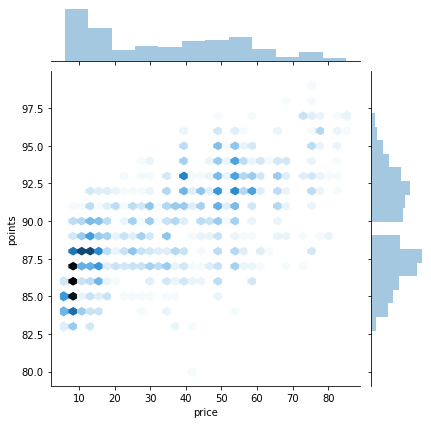

In [42]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 87], kind='hex', 
              gridsize=33)

Éstas gráficas me han ayudado para corroborar varios datos que saqué anteriormente; El promedio de los vinos, promedio de la calificación entre las provincias y además que me mostró valores atípicos en los que podría hacer un segundo análisis para determinar el causante de los mismos y si son realmente necesarios para la investigación/procedimiento.

### ---------------------------------------------------- Segunda Parte ----------------------------------------------------

    Importando nuevas librerías y paquetes necesarios

In [43]:
import sys
import nltk
import ssl
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

    Aqui leo el archivo csv

In [45]:
dd = pd.read_csv("C:\\Users\\Kradn\\OneDrive\\Escritorio\\Mineria de Datos\\Practica2\\rev-solo.csv")

    Aqui muestro la tabla para poder identificar con que trabajaré

In [47]:
dd.head()

,Aromas include tropical fruit broom brimstone and dried herb. The palate isn't overly expressive offering unripened apple citrus and dried sage alongside brisk acidity.,Italy,White Blend
0,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
1,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris
2,Pineapple rind lemon pith and orange blossom s...,US,Riesling
3,Much like the regular bottling from 2012 this ...,US,Pinot Noir
4,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot


    Aqui pongo solo las columnas que voy a necesitar

In [51]:
dd.columns = ['description', 'country', 'variety']

    Calculo la longitud

In [53]:
n = len(dd)

    Aqui se identifican las palabras "vacías" osea, pronombres, artículos, etc

In [54]:
spa = stopwords.words("english")

    Aqui reducimos una palabra a su raíz.

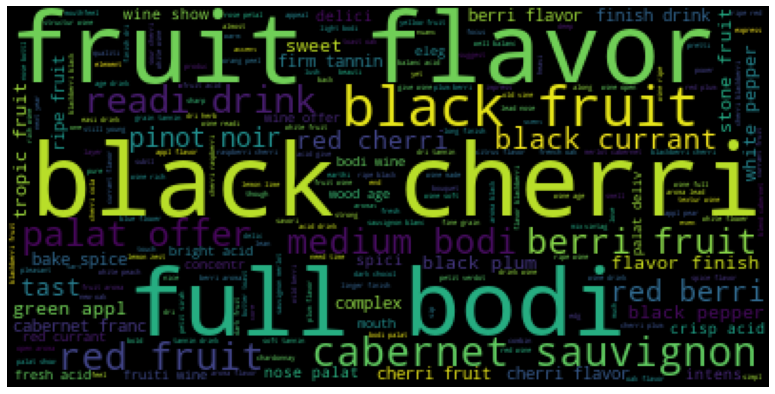

In [55]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
reemplazos = []
for r in range(n):
    original = dd.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
dd['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

    Aqui se están mostrando las palabras que se identificaron como las más repetidas en la descripción

    Aqui cree otro archivo csv para poder trabajar solamente con esos archivos.

In [57]:
header = ['country', 'description', 'variety']
dd.to_csv('solo-rev.csv', columns = header)
e = pd.read_csv('solo-rev.csv')
e.head(4)

,Unnamed: 0,country,description,variety
0,0,Portugal,This is ripe and fruity a wine that is smooth ...,Portuguese Red
1,1,US,Tart and snappy the flavors of lime flesh and ...,Pinot Gris
2,2,US,Pineapple rind lemon pith and orange blossom s...,Riesling
3,3,US,Much like the regular bottling from 2012 this ...,Pinot Noir


    Aqui eliminé una columna que no necesitaba y simplemente la mandé a llamar para checar no haber borrado otra cosa

In [58]:
e.drop(e.columns[[0]], axis=1, inplace=True)
e.head(4)

,country,description,variety
0,Portugal,This is ripe and fruity a wine that is smooth ...,Portuguese Red
1,US,Tart and snappy the flavors of lime flesh and ...,Pinot Gris
2,US,Pineapple rind lemon pith and orange blossom s...,Riesling
3,US,Much like the regular bottling from 2012 this ...,Pinot Noir


In [59]:
header = ['description', 'country', 'variety']
writer = e[e['country'] == 'Spain']
writer.to_csv('Spain-wine.csv', columns = header, index=False)

lol = pd.read_csv('Spain-wine.csv')
lol.head(4)

,description,country,variety
0,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot
1,Desiccated blackberry leather charred wood and...,Spain,Tempranillo Blend
2,Bland mature aromas of white fruits are on the...,Spain,Albariño
3,Ripe aromas of raisin black plum and horsehide...,Spain,Graciano


    Aqui cree una segunda base de datos para trabajar con la información de los Vinos de España

In [63]:
header = ['description', 'country', 'variety']
writer = e[e['country'] == 'France']
writer.to_csv('France-wine.csv', columns = header, index=False)

lol = pd.read_csv('France-wine.csv')
lol.head(4)

,description,country,variety
0,This dry and restrained wine offers spice in p...,France,Gewürztraminer
1,This has great depth of flavor with its fresh ...,France,Pinot Gris
2,This is a dry wine very spicy with a tight tau...,France,Gewürztraminer
3,Red cherry fruit comes laced with light tannin...,France,Gamay


    Aqui cree otra base de datos para trabajar con la información de los vinos de Francia

    Y aqui abajo cree otra ultima para los datos de Chile

In [65]:
header = ['description', 'country', 'variety']
writer = e[e['country'] == 'Chile']
writer.to_csv('Chile-wine.csv', columns = header, index=False)

lol = pd.read_csv('Chile-wine.csv')
lol.head(4)

,description,country,variety
0,White flower lychee and apple aromas carry the...,Chile,Viognier-Chardonnay
1,A berry aroma comes with cola and herb notes. ...,Chile,Merlot
2,This is much different than Casa Silva's 2009 ...,Chile,Petit Verdot
3,Lightly herbal strawberry and raspberry aromas...,Chile,Pinot Noir


Por ultimo, solamente mostré las palabras repetidas de las 3 bases de datos que acabo de crear

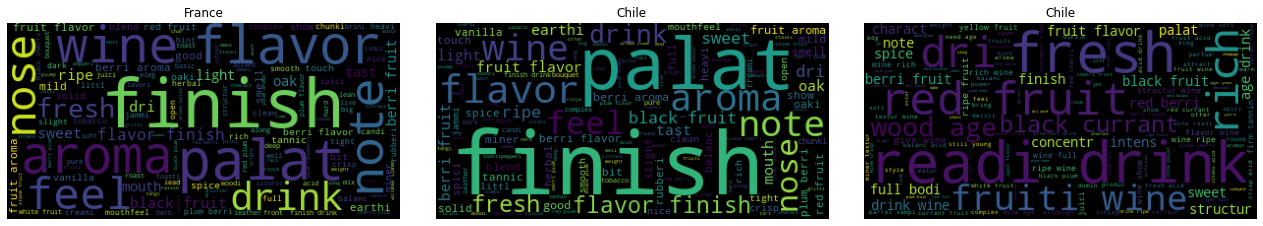

In [66]:
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("Spain-wine.csv", header = None)
dmcu = pd.read_csv("France-wine.csv", header = None)
dord = pd.read_csv("Chile-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Spain", "France", "Chile"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

Para concluir, me gustaría decir que este tipo de procesos, como mostrar las palabras repetidas, puede ser de gran ayuda, si se nos da la tarea de identificar en una encuesta las cosas que a la gente más le gustó, se podría utilizar ésto como un filtro para identificar gustos o palabras en común entre la gente entrevistada.